In [10]:
#Vamos importar os módulos que precisamos
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt
from math import *

### Declarando as variáveis do transformador ($R_1$, $R_2$, $L_1$, $L_2$) e da fonte (frequência e tensão eficaz - Ufonte)

In [11]:
#Resistências 
R1 = 0.5
R2 = R1

#Indutâncias
L1 = 1e-6
L2 = L1

#Capacitâncias
C1 = 1e-6
C2 = C1

#Tensão de entrada
Vin = 10

#frequência
f = 60

#Fator de acoplamento
ka = 0.2 


In [12]:
def CalcularTransformadorSerie(Uf, Rc, w, L, C, Rf):
    # Reatâncias indutivas
    XL = 1j * w * L

    M = ka*sqrt(L*L)
    
    XM = 1j * w * M

    # Reatâncias capacitivas
    XC = 1/(1j * w * C)

    Z=np.array([[Rf+R1+XL+XC, -XM],[-XM, Rf+XL+R2+Rc+XC]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = np.abs(i[1] * (Rc * XC)/(Rc + XC))
    return i[0], i[1], voltagem_2

In [13]:
def CalcularTransformadorParalelo(Uf, Rc):
    Xep = (Rc*XC2)/(Rc+XC2)
    Z=np.array([[Rf+R1+XL1+XC1, -XM],[-XM, Rf+XL2+R2+Xep]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    voltagem_2 = i[1].real*Rc
    return i[0], i[1], voltagem_2

## Loop para plotar os gráficos

In [14]:
#Valores da capacitância
capacitancias = [1.5e-7, 1e-7, 4.7e-7, 1e-6, 4.7e-6]

#valores da frequência
frequencias =  np.linspace(10, 100e3, 1000)


<Figure size 1200x800 with 0 Axes>

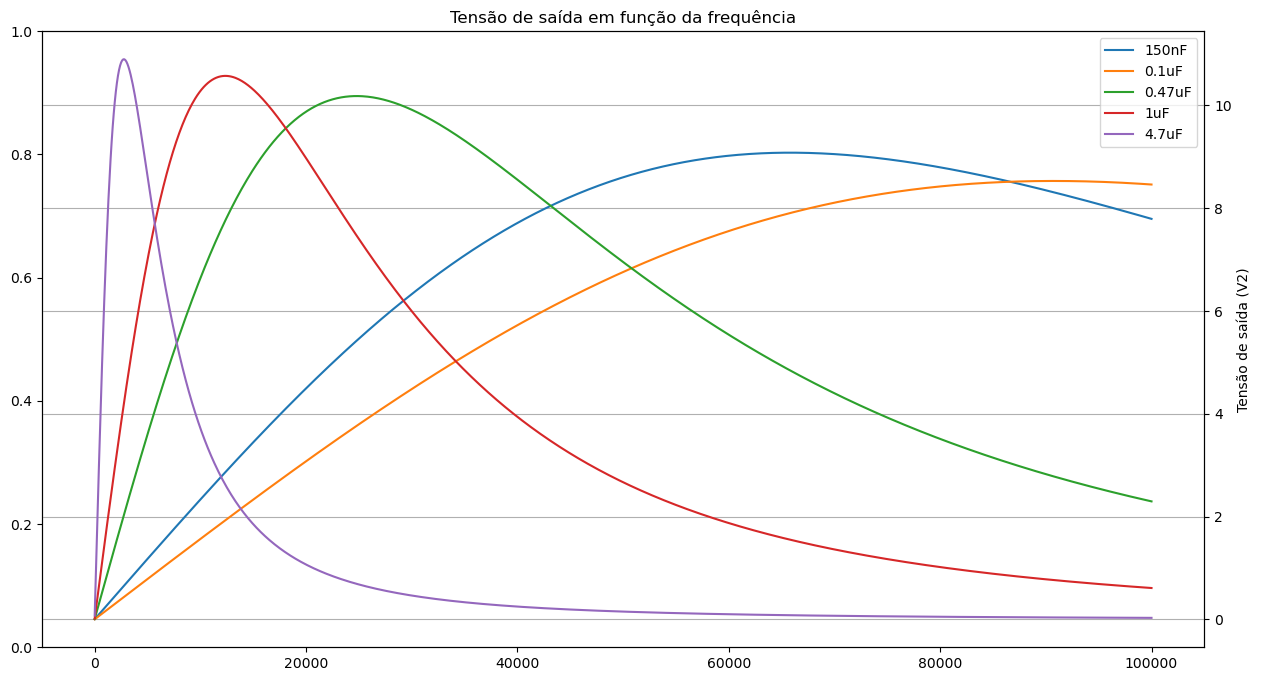

In [20]:
plt.figure(figsize=(12, 8))
fig, Eixo_X1_S = plt.subplots(figsize=(15,8))
Eixo_X2_S = Eixo_X1_S.twinx()

for C in capacitancias:
    indutores = []
    Valores_V2 = []
    eficiencias = []
    Rc = 5
    for f in frequencias:
        w = 2*pi*f
        Rf = 0.25 + ( (2*0.25) / (100e3)) * f
        L = 1/(C*w*w)
        indutores.append(L)
        i1,i2,V2 = CalcularTransformadorSerie(Vin, Rc, w, L, C, Rf)
        eficiencia = (V2*0.5*i2).real/(Vin*0.5*i1).real
        eficiencias.append(eficiencia)
        Valores_V2.append(V2)
    plt.plot(frequencias, Valores_V2)
plt.grid()
plt.title('Tensão de saída em função da frequência')
plt.xlabel('Frequência de Ressonância (Hz)')
plt.ylabel('Tensão de saída (V2)')
plt.legend(['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF'])
plt.show()